# Multivariable Regression Data Prep

Running a multivariable regression based on [2013 crime data in New York State](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) from the FBI: UCR.

As per the Thinkful curriculum, the regression will take the form:
$$Propertycrime = \alpha + Population + Population^{2} + Murder + Robbery$$

Additionally, `Robbery` and `Murder`, which are currently continuous variables will be One Hot Encoded in the following manner:

` Robberies|Murders = 0 == 0`

` Robberies|Murders > 0 == 1`

This is just a data preparation exercise - the model will be constructed in a later lesson.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
fbi = pd.read_excel("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", 
                    skiprows=[0,1,2,3], skipfooter=3)

In [20]:
fbi.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [21]:
fbi.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,10685,3,0,NaN,0,2,1,541,9,529,3,NaN
344,Woodridge Village,829,7,0,NaN,0,0,7,17,8,9,0,0.0
345,Woodstock Town,5931,2,0,NaN,0,0,2,58,13,45,0,NaN
346,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10.0
347,Yorktown Town,36643,15,0,NaN,0,2,13,334,45,287,2,NaN


In [22]:
fbi['PopulationSquared'] = fbi['Population'] * fbi['Population']

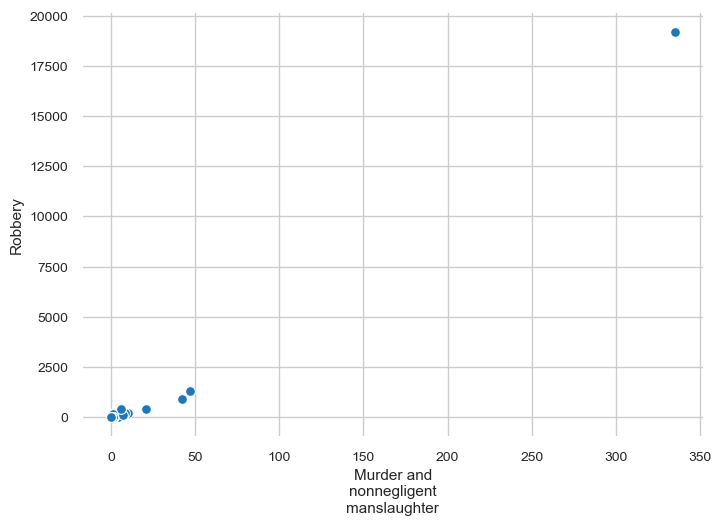

In [23]:
sns.set_style('whitegrid')
sns.scatterplot(data=fbi, x='Murder and\nnonnegligent\nmanslaughter', y='Robbery')
plt.show()

In [30]:
fbi.sort_values('Murder and\nnonnegligent\nmanslaughter', ascending=False)[:10]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopulationSquared
216,New York,8396126,52384,335,NaN,1112,19170,31767,141971,16606,117931,7434,NaN,70494931807876
35,Buffalo,258789,3249,47,NaN,145,1322,1735,12491,3458,8076,957,NaN,66971746521
272,Rochester,210562,2107,42,NaN,92,918,1055,10051,2587,6855,609,132.0,44336355844
310,Syracuse,143834,1192,21,NaN,75,400,696,6473,1781,4298,394,57.0,20688219556
140,Hempstead Village,55198,433,10,NaN,3,204,216,958,206,630,122,2.0,3046819204
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936
285,Schenectady,66041,607,8,NaN,31,203,365,2800,769,1878,153,NaN,4361413681
321,Utica,61686,361,7,NaN,27,102,225,2528,449,1997,82,NaN,3805162596
262,Poughkeepsie,30778,286,7,NaN,16,100,163,787,189,589,9,NaN,947285284
346,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10.0,39654349956


In [32]:
fbi.sort_values('Robbery', ascending=False)[:10]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopulationSquared
216,New York,8396126,52384,335,NaN,1112,19170,31767,141971,16606,117931,7434,NaN,70494931807876
35,Buffalo,258789,3249,47,NaN,145,1322,1735,12491,3458,8076,957,NaN,66971746521
272,Rochester,210562,2107,42,NaN,92,918,1055,10051,2587,6855,609,132.0,44336355844
310,Syracuse,143834,1192,21,NaN,75,400,696,6473,1781,4298,394,57.0,20688219556
346,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10.0,39654349956
206,Mount Vernon,68071,554,2,NaN,7,228,317,1436,317,972,147,NaN,4633661041
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936
140,Hempstead Village,55198,433,10,NaN,3,204,216,958,206,630,122,2.0,3046819204
285,Schenectady,66041,607,8,NaN,31,203,365,2800,769,1878,153,NaN,4361413681
218,Niagara Falls,49574,584,3,NaN,12,166,403,2807,746,1949,112,22.0,2457581476


In [31]:
fbi.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopulationSquared
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000,3.480000e+02
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658,2.035547e+11
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411,3.778876e+12
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,9.018117e+06
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,5.232568e+07
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000,3.397536e+08
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,7.049493e+13


# Data Cleaning Decisions

There are no missing values to deal with.  The large cities have very anomalous Murder and Robbery count.  Because this is a very simple model setup, I am choosing to encode any values greater than 2 standard deviations away from the mean as `np.nan`. 

In [36]:
# Functions to apply data cleaning logic.

def murder(m):
    if m == 0:
        murder_code = 0
    elif m <= 40: # Mean rounded to 2 and STD rounded up to 19             
        murder_code = 1
    else:
        murder_code = np.nan
    return murder_code

def robbery(r):
    if r == 0:
        robbery_code = 0
    elif r <= 2135: # Mean rounded to 73 and STD rounded to 1031
        robbery_code = 1
    else:
        robbery_code = np.nan
    return robbery_code

In [37]:
fbi['MurderCode'] = fbi['Murder and\nnonnegligent\nmanslaughter'].apply(murder)
fbi['RobberyCode'] = fbi['Robbery'].apply(robbery)

In [39]:
fbi.sort_values('Population', ascending=False)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,PopulationSquared,MurderCode,RobberyCode
216,New York,8396126,52384,335,NaN,1112,19170,31767,141971,16606,117931,7434,NaN,70494931807876,NaN,NaN
35,Buffalo,258789,3249,47,NaN,145,1322,1735,12491,3458,8076,957,NaN,66971746521,NaN,1.0
272,Rochester,210562,2107,42,NaN,92,918,1055,10051,2587,6855,609,132.0,44336355844,NaN,1.0
346,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10.0,39654349956,1.0,1.0
310,Syracuse,143834,1192,21,NaN,75,400,696,6473,1781,4298,394,57.0,20688219556,1.0,1.0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3.0,13993943616,1.0,1.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,9595377936,1.0,1.0
126,Greece Town,96667,151,0,NaN,9,60,82,2303,332,1925,46,NaN,9344508889,0.0,1.0
267,Ramapo Town,87204,57,2,NaN,5,9,41,567,88,466,13,NaN,7604537616,1.0,1.0
57,Clarkstown Town,80705,65,0,NaN,8,17,40,1515,99,1388,28,NaN,6513297025,0.0,1.0


Looks good!